<a href="https://colab.research.google.com/github/Sukhjit21/Movie-Revenue-Prediction/blob/main/NNMoviePopularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Popularity Prediction ECS 171 Group Project**

**Project Overview**

In this project, an in-depth analysis is conducted on a comprehensive dataset comprising the top 10,000 movies, focusing on exploring the correlations between Genre and Budget, and using those to predict Popularity. By dissecting the intricate interplay between these factors, this study seeks to uncover patterns that contribute to a film's success. Through this analysis, valuable insights could be gained into the dynamics of the film industry, aiding filmmakers and producers in making informed decisions to maximize both artistic and commercial achievements. This study's findings have the potential to reshape the film industry landscape by providing guidance to filmmakers, producers, and investors. The shocking results will unveil a plot-twist unlike any other: the secret to making a popular movie!

In [1]:
!pip install gdown
!gdown --id 1VmA2Z5u809pr5Ro9GjH9u8Jh6lcI2FYJ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VmA2Z5u809pr5Ro9GjH9u8Jh6lcI2FYJ
To: /content/popular_10000_movies_tmdb.csv
100% 4.84M/4.84M [00:00<00:00, 36.4MB/s]


**Data Exploration**

In [2]:
import pandas as pd
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('popular_10000_movies_tmdb.csv')
data.head() #'Tagline', 'Overview', 'Original Language', 'Release Date'
z = data.drop(columns=['tagline', 'overview', 'original_language', 'release_date', 'title'])
df = pd.DataFrame(z)
df

,id,genres,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,"['Horror', 'Mystery', 'Thriller']",7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103
1,640146,"['Action', 'Adventure', 'Science Fiction']",6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125
2,502356,"['Animation', 'Adventure', 'Family', 'Fantasy'...",7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92
3,868759,"['Action', 'Comedy', 'Romance']",7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120
4,594767,"['Action', 'Comedy', 'Fantasy', 'Adventure']",6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130
...,...,...,...,...,...,...,...,...,...
9995,374473,['Drama'],7.7,1220,10.774,0,"['Why Not Productions', 'Wild Bunch', 'Sixteen...",15793051,100
9996,16774,"['TV Movie', 'Fantasy', 'Animation', 'Action',...",6.3,99,12.739,0,"['IDT Entertainment', 'Film Roman']",0,73
9997,13564,"['Horror', 'Thriller']",5.6,263,12.769,0,"['Dark Castle Entertainment', 'Warner Premiere']",0,81
9998,482204,"['Drama', 'Romance']",5.0,5,10.425,0,[],0,89


In [ ]:
data.describe()

,id,vote_average,vote_count,popularity,budget,revenue,runtime
count,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,3.152363e+05,6.326870,1526.84240,31.488241,1.950457e+07,5.976926e+07,100.029600
std,3.335982e+05,1.413969,2868.71462,111.444869,3.887137e+07,1.542951e+08,28.777188
min,5.000000e+00,0.000000,0.00000,7.219000,0.000000e+00,0.000000e+00,0.000000
25%,1.221950e+04,5.900000,122.00000,13.529000,0.000000e+00,0.000000e+00,90.000000
50%,1.968140e+05,6.500000,480.00000,17.615500,3.053035e+05,1.000000e+06,100.000000
75%,5.643672e+05,7.100000,1555.00000,27.159500,2.200000e+07,4.928871e+07,114.000000
max,1.119921e+06,10.000000,33633.00000,5089.969000,5.793304e+08,2.923706e+09,449.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  int64  
 1   title                 10000 non-null  object 
 2   release_date          9979 non-null   object 
 3   genres                10000 non-null  object 
 4   original_language     10000 non-null  object 
 5   vote_average          10000 non-null  float64
 6   vote_count            10000 non-null  int64  
 7   popularity            10000 non-null  float64
 8   overview              9923 non-null   object 
 9   budget                10000 non-null  int64  
 10  production_companies  10000 non-null  object 
 11  revenue               10000 non-null  int64  
 12  runtime               10000 non-null  int64  
 13  tagline               7241 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [ ]:
#sns.set_style("whitegrid")
#sns.pairplot(data, hue="revenue", height=3); # color based column named origin
#plt.show()

<ipython-input-249-0a28fe303231>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


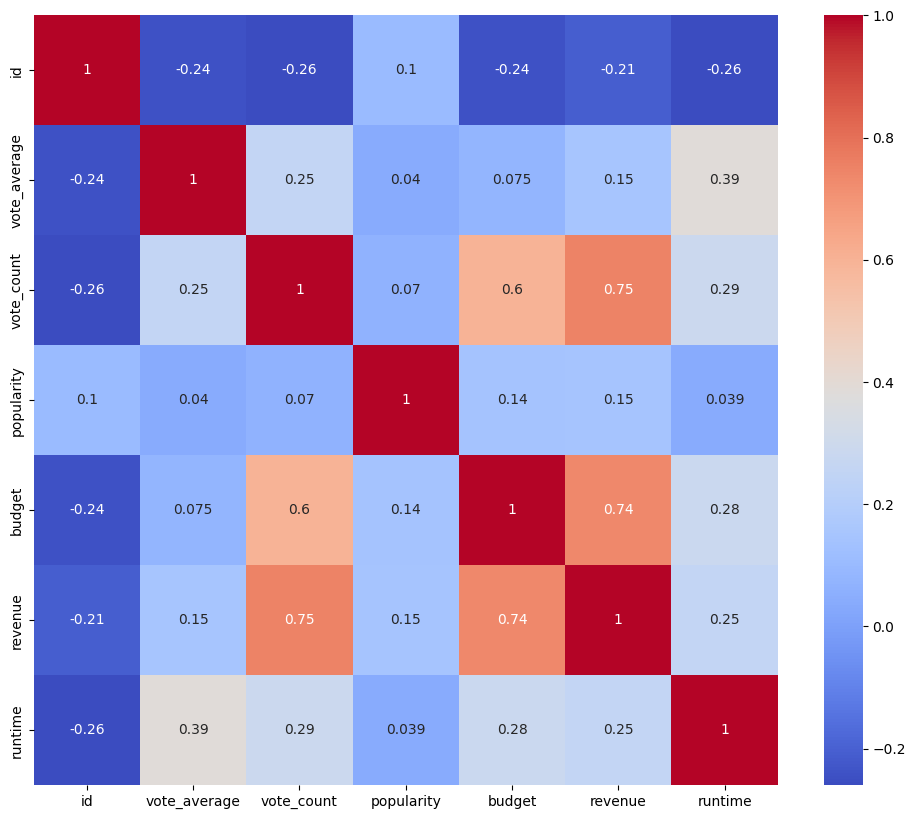

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df['genres']

0                       ['Horror', 'Mystery', 'Thriller']
1              ['Action', 'Adventure', 'Science Fiction']
2       ['Animation', 'Adventure', 'Family', 'Fantasy'...
3                         ['Action', 'Comedy', 'Romance']
4            ['Action', 'Comedy', 'Fantasy', 'Adventure']
                              ...                        
9995                                            ['Drama']
9996    ['TV Movie', 'Fantasy', 'Animation', 'Action',...
9997                               ['Horror', 'Thriller']
9998                                 ['Drama', 'Romance']
9999                                            ['Drama']
Name: genres, Length: 10000, dtype: object

**Keep the Primary genre drop the rest**

In [4]:
#df = pd.DataFrame(data)
from sklearn.preprocessing import OneHotEncoder
lis = df['genres']
empty_list = []
for i in range(0, 10000):
    my_list = eval(lis[i])
    if len(my_list) == 0:
      continue
    else:
      df['genres'][i] = my_list[0]
      #print(i, my_list[0])



<ipython-input-4-a2124c702284>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'][i] = my_list[0]


**Keep primary production company**

In [5]:
lis = df['production_companies']
empty_list = []
for i in range(0, 10000):
    my_list = eval(lis[i])
    if len(my_list) == 0:
      continue
    else:
      df['production_companies'][i] = my_list[0]
      #print(i, my_list[0])


<ipython-input-5-a38a3650ead1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['production_companies'][i] = my_list[0]


In [6]:
enc = OneHotEncoder(handle_unknown='ignore')

myGenre = pd.DataFrame(enc.fit_transform(data[['genres']]).toarray())
data['genres'] = data['genres'].astype('category')
data = data.join(myGenre)
data = data.drop(columns = ['genres'])

myProduction = pd.DataFrame(enc.fit_transform(data[['production_companies']]).toarray())
data['production_companies'] = data['production_companies'].astype('category')

myProduction.columns = [f"production_{col}" for col in myProduction.columns]

data = data.join(myProduction)
data = data.drop(columns = ['production_companies'])

data.columns = data.columns.astype(str)



In [ ]:
data

,id,title,release_date,original_language,vote_average,vote_count,popularity,overview,budget,revenue,...,production_7980,production_7981,production_7982,production_7983,production_7984,production_7985,production_7986,production_7987,production_7988,production_7989
0,758323,The Pope's Exorcist,2023-04-05,English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,65675816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,464566092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,502356,The Super Mario Bros. Movie,2023-04-05,English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,1121048165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,868759,Ghosted,2023-04-18,English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,594767,Shazam! Fury of the Gods,2023-03-15,English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,133437105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,374473,"I, Daniel Blake",2016-10-21,English,7.7,1220,10.774,"A middle aged carpenter, who requires state we...",0,15793051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,16774,Hellboy Animated: Sword of Storms,2006-10-28,English,6.3,99,12.739,A folklore professor becomes unwittingly posse...,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,13564,Return to House on Haunted Hill,2007-10-03,English,5.6,263,12.769,Eight years have passed since Sara Wolfe and E...,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,482204,My Sister-in-law's Job,2017-08-31,Korean,5.0,5,10.425,An erotic film that depicts the dangerous rela...,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df

,id,genres,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
0,758323,Horror,7.4,619,5089.969,18000000,Screen Gems,65675816,103
1,640146,Action,6.6,2294,4665.438,200000000,Marvel Studios,464566092,125
2,502356,Animation,7.5,1861,3935.550,100000000,Universal Pictures,1121048165,92
3,868759,Action,7.2,652,2791.532,0,Skydance Media,0,120
4,594767,Action,6.8,1510,2702.593,125000000,New Line Cinema,133437105,130
...,...,...,...,...,...,...,...,...,...
9995,374473,Drama,7.7,1220,10.774,0,Why Not Productions,15793051,100
9996,16774,TV Movie,6.3,99,12.739,0,IDT Entertainment,0,73
9997,13564,Horror,5.6,263,12.769,0,Dark Castle Entertainment,0,81
9998,482204,Drama,5.0,5,10.425,0,[],0,89


In [7]:
from scipy import stats
from sklearn import preprocessing

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(data.drop(columns = ['id','tagline', 'overview', 'original_language', 'release_date', 'revenue', 'title',]))

# Check the p-value
if p_value < 0.05:
    print("The data is not normally distributed so we should use normalization.")
else:
    print("The data is normally distributed therefore we are going to use standardization.")

The data is not normally distributed so we should use normalization.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [8]:
X = data.drop(columns = ['id','tagline', 'overview', 'original_language', 'release_date', 'revenue', 'title',]) #remaining columns vote_average', 'vote_count', 'popularity', 'budget', 'runtime
#idk if we need to normalize

min_max_scaler = preprocessing.MinMaxScaler()
#uncomment these two lines and comment 3rd one to normalize the data
normalized_data = min_max_scaler.fit_transform(data.drop(['id','tagline', 'overview', 'original_language', 'release_date', 'revenue', 'title'], axis=1))
normalized_datax = pd.DataFrame(normalized_data, columns = X.columns)
#normalized_datax = data.drop(columns = ['id','tagline', 'overview', 'original_language', 'release_date', 'revenue', 'title', 'genres', 'production_companies'])
normalized_datax.head()

,vote_average,vote_count,popularity,budget,runtime,0,1,2,3,4,...,production_7980,production_7981,production_7982,production_7983,production_7984,production_7985,production_7986,production_7987,production_7988,production_7989
0,0.74,0.018405,1.000000,0.031070,0.229399,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.66,0.068207,0.916476,0.345226,0.278396,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.75,0.055333,0.772875,0.172613,0.204900,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.72,0.019386,0.547797,0.000000,0.267261,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.68,0.044896,0.530298,0.215766,0.289532,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X = normalized_datax
y= data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 21)

In [ ]:
reg = LinearRegression()

regmodel = reg.fit(X_train, y_train)
len(reg.coef_)

In [ ]:
reg.coef_

array([-1.17326225e+07,  1.12997433e+09, -7.66461876e+06, ...,
        2.98339940e+19,  0.00000000e+00,  2.98339940e+19])

In [ ]:
X.columns

Index(['vote_average', 'vote_count', 'popularity', 'budget', 'runtime', '0',
       '1', '2', '3', '4',
       ...
       'production_7980', 'production_7981', 'production_7982',
       'production_7983', 'production_7984', 'production_7985',
       'production_7986', 'production_7987', 'production_7988',
       'production_7989'],
      dtype='object', length=10318)

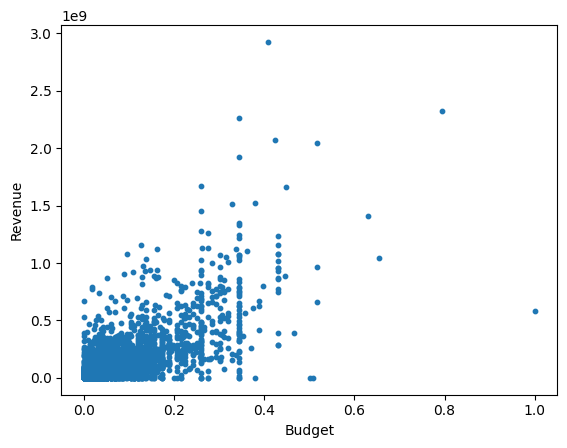

In [ ]:
yhat_train = reg.predict(X_train)

yhat_test = reg.predict(X_test)

plt.scatter(X_train['budget'], y_train, s=10)
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()


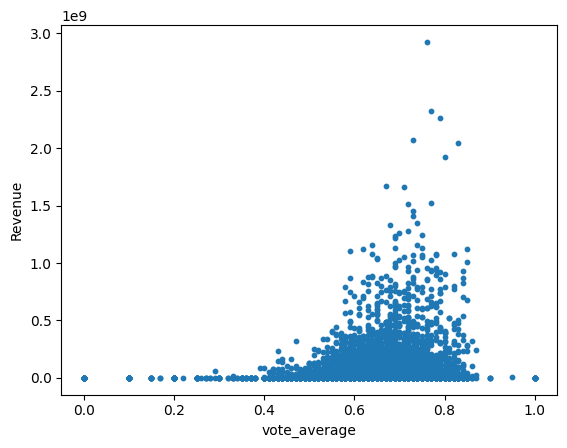

In [ ]:

plt.scatter(X_train['vote_average'], y_train, s=10)
plt.xlabel("vote_average")
plt.ylabel("Revenue")
plt.show()

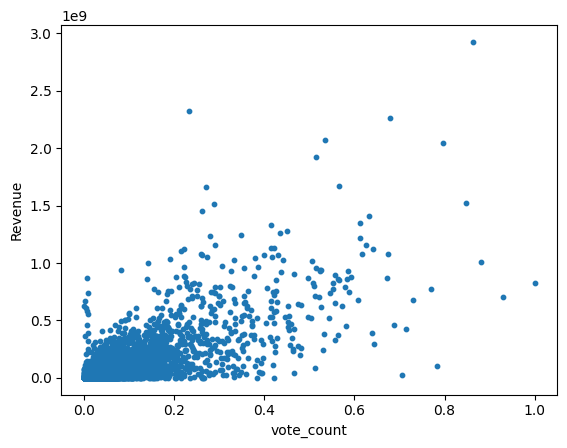

In [ ]:
plt.scatter(X_train['vote_count'], y_train, s=10)
plt.xlabel("vote_count")
plt.ylabel("Revenue")
plt.show()

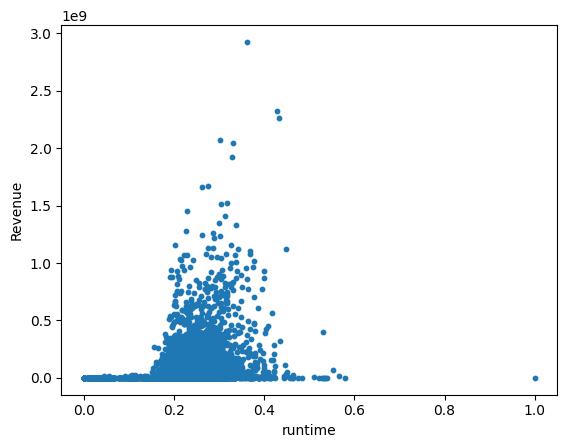

In [ ]:
plt.scatter(X_train['runtime'], y_train, s=10)
plt.xlabel("runtime")
plt.ylabel("Revenue")
plt.show()

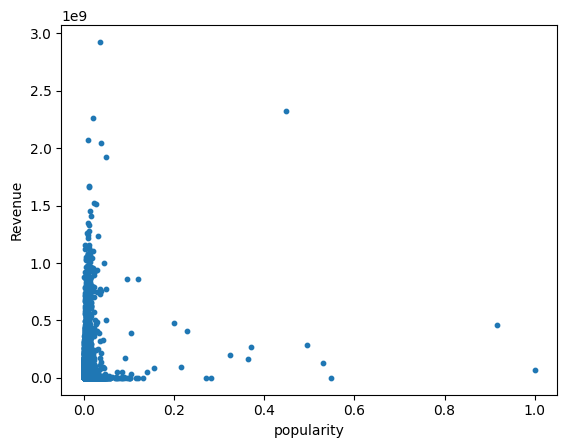

In [ ]:
plt.scatter(X_train['popularity'], y_train, s=10)
plt.xlabel("popularity")
plt.ylabel("Revenue")
plt.show()

In [ ]:
print('\nMean squared error training: %.2f' % mean_squared_error(y_train, yhat_train))
print('\nMean squared error testing: %.2f' % mean_squared_error(y_test, yhat_test))


Mean squared error training: 675697998806435.38

Mean squared error testing: 3768517409013513169214405319052180911554560.00


Neural Network to Predict Revenue:

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() # Initialising the ANN Sequential model

model.add(Dense(units = 64, activation = 'relu', input_dim=X_train.shape[1]))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='mean_squared_error', metrics = ['mean_squared_error'])

history = model.fit(X_train, y_train, epochs=50, validation_split = 0.2)

Epoch 1/50
200/200 [==============================] - 3s 13ms/step - loss: 28342860700975104.0000 - mean_squared_error: 28342860700975104.0000 - val_loss: 26012207435218944.0000 - val_mean_squared_error: 26012207435218944.0000
Epoch 2/50
200/200 [==============================] - 2s 9ms/step - loss: 28342869290909696.0000 - mean_squared_error: 28342869290909696.0000 - val_loss: 26012207435218944.0000 - val_mean_squared_error: 26012207435218944.0000
Epoch 3/50
200/200 [==============================] - 2s 9ms/step - loss: 28342867143426048.0000 - mean_squared_error: 28342867143426048.0000 - val_loss: 26012207435218944.0000 - val_mean_squared_error: 26012207435218944.0000
Epoch 4/50
200/200 [==============================] - 2s 9ms/step - loss: 28342864995942400.0000 - mean_squared_error: 28342864995942400.0000 - val_loss: 26012207435218944.0000 - val_mean_squared_error: 26012207435218944.0000
Epoch 5/50
200/200 [==============================] - 3s 14ms/step - loss: 28342860700975104.00

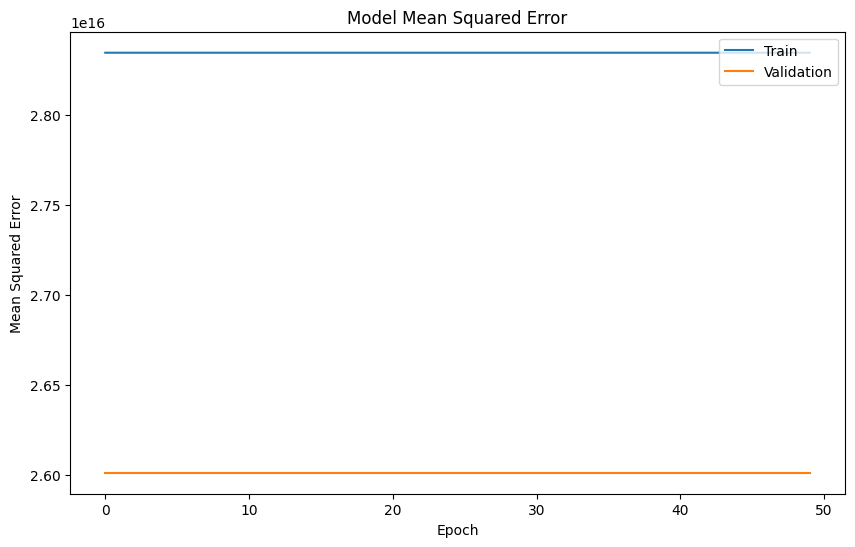

In [17]:
plt.figure(figsize=(10,6))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()